<a href="https://colab.research.google.com/github/mgnarag/binarization-autoencoder/blob/main/Finetuning_model6b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fine tuning**

In [1]:
from google.colab import drive
drive.mount("/content/drive")
!ls drive/My\ Drive
file_path = "/content/drive/My Drive/Architectural_designs/one quadrant/"

Mounted at /content/drive
 1872_Mindanao_NAP_D.FedericoCaballero.tif
 1885_Mactan_NAP_FelixPelayo.tiff
 201464423-23022858-PaymentSlip.pdf
 313490484_646790150357239_663796780442369775_n.jpg
 361079911_248325231393045_2145216296096417082_n.jpg
'Applied Physics 184 FX-2'
 Architectural_designs
 autoencoder_32
'autoencoder_32 (1)'
 autoencoder_64
'BS Applied Physics'
 Classroom
'CLEAN_[WB] 1872_Mindanao_NAP_D (1).FedericoCaballero.tif'
'CLEAN_[WB] 1872_Mindanao_NAP_D (2).FedericoCaballero.tif'
'CLEAN_[WB] 1872_Mindanao_NAP_D (3).FedericoCaballero.tif'
'CLEAN_[WB] 1872_Mindanao_NAP_D.FedericoCaballero.tif'
'CNN scores.gsheet'
'Colab Notebooks'
'CONSENT_NARAG_MARK JEREMY_G.pdf'
 CONSENT_NARAG_MARKJEREMY_G.pdf
 CS284
'Dorm bill.png'
 Fast-Dreambooth
'fingerprint (1).pb'
'fingerprint (2).pb'
 fingerprint.pb
 FN.png
 FP.png
 GAN
'Geology (Ate Grass)'
'Getting started.pdf'
 image.jpg
 IMG_5032.jpeg
 IMG_6546.PNG
'IMG_9359 (1).PNG'
 IMG_9359.PNG
'Information Sharing Consent Form - NARAG.pdf'
'I

In [2]:

import time
import pandas as pd


import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


from PIL import Image, ImageOps
import os
import numpy as np

epoch = 100
model_number = 6
size = 128

def crop(im):
    width, height = im.size
    data = []

    for j in np.arange(0,int(height/size)+1,0.3775):
        for i in np.arange(0,int(width/size)+1,0.3775):
            im1 = im.crop((0 + (size*i), 0 + (size*j), size + (size*i), size + (size*j)))
            im1 = np.array(im1)
            im1 = im1.astype(np.float32)
            im1 = im1/255
            data.append(im1)
    return data




train_input = np.array(crop(ImageOps.grayscale(Image.open(file_path + "final_input_train.png"))))
print("Done reading the  training input of size = ", train_input.shape)

train_output = np.array(crop(ImageOps.grayscale(Image.open(file_path + "cleaned_output_train.png"))))
print("Done reading the  training out of size = ", train_output.shape)

test_input = np.array(crop(ImageOps.grayscale(Image.open(file_path + "final_input_test.png"))))
print("Done reading the  test input of size = ", test_input.shape)

test_output = np.array(crop(ImageOps.grayscale(Image.open(file_path + "cleaned_output_test.png"))))
print("Done reading the  test output of size = ", test_output.shape)
#'''
data = []

Done reading the  training input of size =  (22484, 128, 128)
Done reading the  training out of size =  (22484, 128, 128)
Done reading the  test input of size =  (9394, 128, 128)
Done reading the  test output of size =  (9394, 128, 128)


In [3]:
from sklearn.model_selection import train_test_split

def load_images_from_folder(folder_path, size, test_size):
    images = []
    filenames = sorted(os.listdir(folder_path))
    for filename in filenames:
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            im = ImageOps.grayscale(Image.open(img_path))
            images.extend(crop(im))
    # Split the images into training and validation sets
    X_train, X_val = train_test_split(images, test_size=test_size, random_state=42)
    return np.array(X_train), np.array(X_val)

input_folder_path = file_path+"7 Fine tuning/input"
output_folder_path = file_path+"7 Fine tuning/output"
size = 128
test_size = 0.2

# Load input and output images, split into training and validation sets
train_input_add, test_input_add = load_images_from_folder(input_folder_path, size, test_size)
train_output_add, test_output_add = load_images_from_folder(output_folder_path, size, test_size)


train_input = np.concatenate((train_input,train_input_add))
train_output = np.concatenate((train_output,train_output_add))
test_input = np.concatenate((test_input,test_input_add))
test_output = np.concatenate((test_output,test_output_add))


print("Training input adding:", train_input_add.shape)
print("Validation input adding:", test_input_add.shape)
print("Training output adding:", train_output_add.shape)
print("Validation output adding:", test_output_add.shape)


print("Training input size after adding:", train_input.shape)
print("Validation input size  after adding:", test_input.shape)
print("Training output size  after adding:", train_output.shape)
print("Validation output size  after adding:", test_output.shape)

images = []
train_input_add = []
train_output_add = []
test_input_add = []
test_output_add = []

Training input adding: (6873, 128, 128)
Validation input adding: (1719, 128, 128)
Training output adding: (6873, 128, 128)
Validation output adding: (1719, 128, 128)
Training input size after adding: (29357, 128, 128)
Validation input size  after adding: (11113, 128, 128)
Training output size  after adding: (29357, 128, 128)
Validation output size  after adding: (11113, 128, 128)


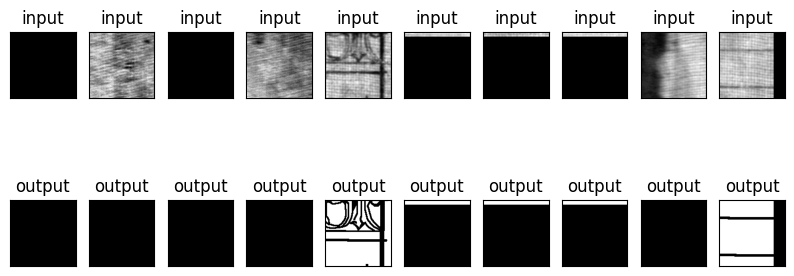

In [4]:
import matplotlib.pyplot as plt
N = 29000
n=10
plt.figure(figsize=(10, 4))
for i in range(0,10):

    ax = plt.subplot(2, n, i + 1)
    plt.title("input")
    plt.imshow((train_input[i+N]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    bx = plt.subplot(2, n, i + n + 1)
    plt.title("output")
    plt.imshow((train_output[i+N]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()



In [5]:
start = time.time()
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class autoenc(Model):
  def __init__(self):
    super(autoenc, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(size, size, 1)),
      layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = autoenc()


#autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
from tensorflow.keras.optimizers import Adam

learning_rate = 0.01  # You can adjust this value as needed

autoencoder.compile(optimizer=Adam(learning_rate=learning_rate), loss=losses.MeanSquaredError())


model = autoencoder.fit(train_input, train_output,
                epochs=100,
                shuffle=True,
                validation_data=(test_input, test_output))

autoencoder.encoder.summary()


# Save the fine-tuned model
autoencoder.save(file_path + '7 Fine tuning/' + 'v3_autoencoder_'+str(model_number)+'_b')

# Save the fine-tune history
fine_tune_loss = model.history['loss']
fine_tune_loss_df = pd.DataFrame(fine_tune_loss)
fine_tune_loss_df.to_csv(file_path + '7 Fine tuning/' + 'v3_loss_'+str(model_number)+'_b.csv')

fine_tune_val_loss = model.history['val_loss']
fine_tune_val_loss_df = pd.DataFrame(fine_tune_val_loss)
fine_tune_val_loss_df.to_csv(file_path + '7 Fine tuning/' +'v3_val_loss_'+str(model_number)+'_b.csv')


# record end time
end = time.time()

print("The time of execution of above program is :",
      (end-start), "seconds")

Epoch 1/100
918/918 [==============================] - 22s 19ms/step - loss: 0.0263 - val_loss: 0.0144
Epoch 2/100
918/918 [==============================] - 14s 15ms/step - loss: 0.0165 - val_loss: 0.0127
Epoch 3/100
918/918 [==============================] - 14s 15ms/step - loss: 0.0153 - val_loss: 0.0121
Epoch 4/100
918/918 [==============================] - 14s 15ms/step - loss: 0.0149 - val_loss: 0.0126
Epoch 5/100
918/918 [==============================] - 14s 15ms/step - loss: 0.0146 - val_loss: 0.0112
Epoch 6/100
918/918 [==============================] - 14s 15ms/step - loss: 0.0143 - val_loss: 0.0116
Epoch 7/100
918/918 [==============================] - 14s 15ms/step - loss: 0.0138 - val_loss: 0.0113
Epoch 8/100
918/918 [==============================] - 14s 15ms/step - loss: 0.0136 - val_loss: 0.0108
Epoch 9/100
918/918 [==============================] - 14s 15ms/step - loss: 0.0135 - val_loss: 0.0109
Epoch 10/100
918/918 [==============================] - 14s 15ms/step - l

In [4]:
import time
start = time.time()
import tensorflow as tf
import pandas as pd

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import load_model
import tensorflow.keras as keras

model_number = 6
# Load your saved model
autoencoder = load_model(file_path + '1 Models/' + 'autoencoder_'+str(model_number) + '_b')

# Freeze layers to prevent retraining
for layer in autoencoder.layers:
    layer.trainable = True

# Compile the model with custom learning parameters
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

# Fine-tune the model
fine_tune_history = autoencoder.fit(train_input, train_output,
                                     epochs=1000,
                                     shuffle=True,
                                     validation_data=(val_input, val_output))

# Save the fine-tuned model
autoencoder.save(file_path + '7 Fine tuning/' + 'autoencoder_fine_tuned_'+str(model_number))

# Save the fine-tune history
fine_tune_loss = fine_tune_history.history['loss']
fine_tune_loss_df = pd.DataFrame(fine_tune_loss)
fine_tune_loss_df.to_csv(file_path + '7 Fine tuning/' + 'fine_tune_loss_'+str(model_number)+'.csv')

fine_tune_val_loss = fine_tune_history.history['val_loss']
fine_tune_val_loss_df = pd.DataFrame(fine_tune_val_loss)
fine_tune_val_loss_df.to_csv(file_path + '7 Fine tuning/' +'fine_tune_val_loss_'+str(model_number)+'.csv')

# Record end time
end = time.time()

print("The time of execution of the fine-tuning program is:", (end - start), "seconds")

Epoch 1/1000
215/215 [==============================] - 15s 44ms/step - loss: 0.0291 - val_loss: 0.0263
Epoch 2/1000
215/215 [==============================] - 8s 37ms/step - loss: 0.0242 - val_loss: 0.0249
Epoch 3/1000
215/215 [==============================] - 8s 36ms/step - loss: 0.0231 - val_loss: 0.0255
Epoch 4/1000
215/215 [==============================] - 8s 36ms/step - loss: 0.0227 - val_loss: 0.0231
Epoch 5/1000
215/215 [==============================] - 8s 36ms/step - loss: 0.0221 - val_loss: 0.0230
Epoch 6/1000
215/215 [==============================] - 8s 35ms/step - loss: 0.0216 - val_loss: 0.0222
Epoch 7/1000
215/215 [==============================] - 8s 38ms/step - loss: 0.0215 - val_loss: 0.0228
Epoch 8/1000
215/215 [==============================] - 8s 38ms/step - loss: 0.0213 - val_loss: 0.0220
Epoch 9/1000
215/215 [==============================] - 8s 36ms/step - loss: 0.0210 - val_loss: 0.0218
Epoch 10/1000
215/215 [==============================] - 8s 37ms/step - 

# Testing NBS

In [6]:
train_input = []
val_input = []
train_output = []
val_output = []

from tensorflow import keras
#model_number = 6
#autoencoder = keras.models.load_model(file_path + '7 Fine tuning/' + 'autoencoder_fine_tuned_'+str(model_number))

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf


from PIL import Image, ImageOps
Image.MAX_IMAGE_PIXELS = None
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd

from tensorflow import keras

import time
import os
import cv2


def crop(im):
    width, height = im.size
    data = []
    for j in range(0,int(height/n_size)):
        for i in range(0,int(width/n_size)):
            im1 = im.crop((0 + (n_size*i), 0 + (n_size*j), n_size + (n_size*i), n_size + (n_size*j)))
            im1 = np.array(im1)
            im1 = im1.astype(np.float32)
            im1 = im1/255
            data.append(im1)
    return data

def normalize(arr):
    """
    Linear normalization
    http://en.wikipedia.org/wiki/Normalization_%28image_processing%29
    """
    arr = arr.astype('float')
    # Do not touch the alpha channel
    for i in range(3):
        minval = arr[...,i].min()
        maxval = arr[...,i].max()
        if minval != maxval:
            arr[...,i] -= minval
            arr[...,i] *= (255.0/(maxval-minval))
    return arr

In [9]:
directory = file_path + '7 Fine tuning/test/MFP_J_stitched_v2.tif'
dirty = ImageOps.grayscale(Image.open(directory))
dirty = np.array(dirty)
dirty = Image.fromarray(normalize(dirty).astype('uint8'))

w_dirty, h_dirty = dirty.size

model = 6
METRIC = []

from tensorflow import keras
autoencoder = keras.models.load_model(file_path + '7 Fine tuning/' + 'v3_autoencoder_'+str(model_number)+'_b')
if model == 1:
    n_size = 32
if model == 2:
    n_size = 32
if model == 3:
    n_size = 64
if model == 4:
    n_size = 64
if model == 5:
    n_size = 128
if model == 6:
    n_size = 128
if model == 7:
    n_size = 256
if model == 8:
    n_size = 256

xx = int(w_dirty/n_size)
final=[]

for portion in range(0,xx):
    #print("current portion to clean:", str(portion))

    im1 = dirty.crop((n_size*portion, 0, (n_size*portion) + n_size, h_dirty-128))
    w1, h1 = im1.size
    w = int(w1/n_size)
    h = int(h1/n_size)

    neverbeforeseen = np.array(crop(im1))
    encoded_imgs = autoencoder.encoder(neverbeforeseen).numpy()
    decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

    col = np.vstack((decoded_imgs[0],decoded_imgs[1]))
    for i in range(2,h):
        col = np.vstack((col,decoded_imgs[i]))

    y = np.where(col > 0.5,1,0) #round the values
    y = (y * 255).astype('uint8')
    if portion == 0:
        final = y
    if portion > 0:
        final = np.hstack((final,y))

final = np.squeeze(final)
reconstructed = Image.fromarray(final)
reconstructed.save(file_path + '7 Fine tuning/test/v3_CLEAN_MFP_J_stitched_v2.tif')